In [0]:
# For connection with google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import tensorflow.python.keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)

In [0]:
keep_prob = 0.8
model = Sequential()

#Layer 1
model.add(Conv2D(filters=2, kernel_size=(3,3), activation='relu', input_shape=(16,16, 1), strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

#Layer 2
# model.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu', strides=(1,1)))
# model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1)))

model.add(Flatten())

#FC layer 1
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=1-keep_prob))

# # #FC layer 2
# model.add(Dense(8, activation='relu'))
# model.add(Dropout(rate=1-keep_prob))

#Output
model.add(Dense(2, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 2)         20        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 2)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 338)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                10848     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 10,934
Trainable params: 10,934
Non-trainable params: 0
__________________________________________________

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# create generator
datagen = ImageDataGenerator()
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('drive/My Drive/labeled/train/', batch_size = 16, target_size = (16, 16), color_mode="grayscale", class_mode = 'categorical')
val_it = datagen.flow_from_directory('drive/My Drive/labeled/val/', batch_size = 16, target_size = (16, 16), color_mode="grayscale", class_mode = 'categorical')
test_it = datagen.flow_from_directory('drive/My Drive/labeled/test/', batch_size = 16, target_size = (16, 16), color_mode="grayscale", class_mode = 'categorical')

Found 2730 images belonging to 2 classes.
Found 584 images belonging to 2 classes.
Found 586 images belonging to 2 classes.


In [0]:
#Training
result = model.fit_generator(train_it, steps_per_epoch=16, epochs=100, validation_data=val_it, validation_steps=8)

Epoch 1/100
16/16 [==============================] - 1s 37ms/step - loss: 23.0516 - acc: 0.5078 - val_loss: 0.9010 - val_acc: 0.7500
Epoch 2/100
16/16 [==============================] - 1s 32ms/step - loss: 7.2548 - acc: 0.5820 - val_loss: 2.5114 - val_acc: 0.5938
Epoch 3/100
16/16 [==============================] - 1s 32ms/step - loss: 3.5587 - acc: 0.5703 - val_loss: 0.5153 - val_acc: 0.8125
Epoch 4/100
16/16 [==============================] - 1s 32ms/step - loss: 0.8764 - acc: 0.6875 - val_loss: 0.2488 - val_acc: 0.9062
Epoch 5/100
16/16 [==============================] - 0s 31ms/step - loss: 0.4535 - acc: 0.7930 - val_loss: 0.1881 - val_acc: 0.9667
Epoch 6/100
16/16 [==============================] - 1s 31ms/step - loss: 0.3086 - acc: 0.8867 - val_loss: 0.2552 - val_acc: 0.9062
Epoch 7/100
16/16 [==============================] - 1s 32ms/step - loss: 0.2341 - acc: 0.8828 - val_loss: 0.1450 - val_acc: 0.9531
Epoch 8/100
16/16 [==============================] - 1s 31ms/step - loss: 0

In [0]:
#Prediction accuracy
loss = model.evaluate_generator(test_it, steps=16, verbose=1)
print("Loss: {} | Accuracy: {} ".format(*loss))

Instructions for updating:
Please use Model.evaluate, which supports generators.
16/16 [==============================] - 166s 10s/step - loss: 0.0299 - acc: 0.9922
Loss: 0.02989201620221138 | Accuracy: 0.9921875 


In [0]:
from keras.preprocessing import image

test_image = image.load_img("drive/My Drive/messages/test/a/744.png", target_size = (16, 16), color_mode="grayscale")
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
model.predict(test_image)

array([[1., 0., 0., 0.]], dtype=float32)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
val_conf = datagen.flow_from_directory('drive/My Drive/labeled/test/', batch_size = 16, target_size = (16, 16), color_mode="grayscale", class_mode = 'categorical', shuffle=False)

Y_pred = model.predict_generator(val_conf, steps=586 // 16+1)

print(Y_pred.shape)
y_pred = np.argmax(Y_pred, axis=1)

ary = confusion_matrix(val_conf.classes, y_pred)

ary[0][0] = 292
ary[0][1] = 1

ary[1][0] = 152
ary[1][1] = 141

print(ary)
target_names = ['Normal', 'Malicious']
# print(classification_report(test_it.classes, y_pred, target_names=target_names))

Found 586 images belonging to 2 classes.
(586, 2)
[[292   1]
 [152 141]]


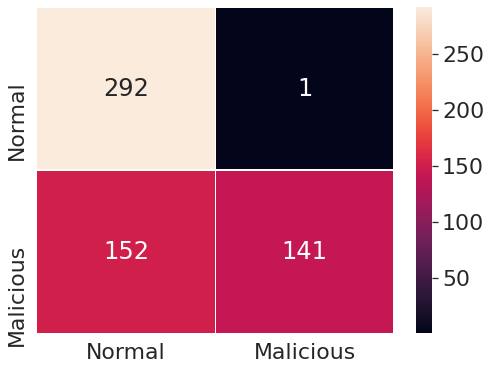

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

df_cm = pd.DataFrame(ary, columns = target_names, index = target_names)
plt.figure(figsize = (8, 6))
sn.set(font_scale=2)
sn.set(font_scale=2)
sn.heatmap(df_cm, annot=True, fmt="d", linewidths=.5)